In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# y = 3 + 2x 가우시안 노이즈
x = 2*np.random.rand(100,1) # 0~ 1 값을 [100,1]
y = 3 + 6*x+np.random.randn(100,1)

# yhat = wx + b + error(np.random.randn(100,1)) : 잔차 , 노이즈

In [15]:
[np.ones((100,1)) , x]

[array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [16]:
x_b = np.c_[np.ones((100,1)),x]

In [17]:
myweights = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [18]:
myweights

array([[2.81116829],
       [5.91850045]])

In [19]:
xdata = np.array([[0],[2]])
xnew = np.c_[np.ones((2,1)),xdata]
pred = xnew.dot(myweights)

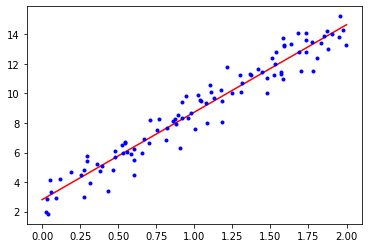

In [20]:
plt.plot(xdata,pred,'r-')
plt.plot(x,y,'b.')

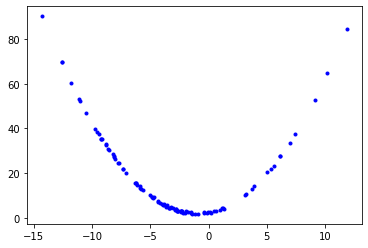

In [26]:
x = 6*np.random.randn(100,1)-3
y = 0.5*(x**2)+x+2+np.random.rand(100,1)

plt.plot(x,y,'b.')
plt.show()

In [24]:
x.shape , y.shape

((100, 1), (100, 1))

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

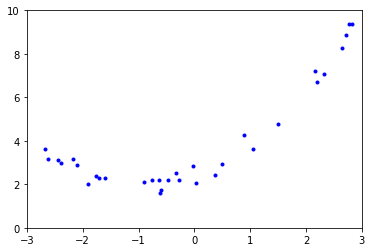

In [28]:
x = 6*np.random.randn(100,1)-3
y = 0.5*(x**2)+x+2+np.random.rand(100,1)

plt.plot(x,y,'b.')
plt.axis([-3,3,0,10])
plt.show()

In [31]:
poly_f = PolynomialFeatures(degree=2,include_bias=False)

In [33]:
x_poly = poly_f.fit_transform(x)

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)

LinearRegression()

In [36]:
lin_reg.intercept_

array([2.49357336])

In [37]:
lin_reg.coef_

array([[0.99912232, 0.49984118]])

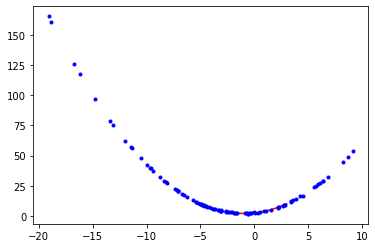

In [39]:
xnew = np.linspace(-3,3,100).reshape(100,1)
xnewPoly = poly_f.transform(xnew)
ypredict = lin_reg.predict(xnewPoly)

plt.plot(xnew,ypredict,'r-')
plt.plot(x,y,'b.')
plt.show()

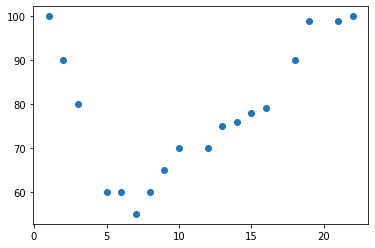

In [40]:
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x, y)
plt.show()


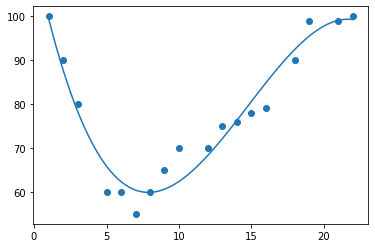

In [41]:
import numpy
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()


In [42]:
t1 =  np.array([
                    [ 1,    1000],
                    [ 5,   10000],
                    [10,  100000],
               ])
t2 =  np.array([
                    [  2,    100],
                    [ 15,  20000],
                    [100, 300000],
               ])

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, LSTM
import numpy as np

x = np.array([[[1.],[2.],[3.],[4.],[5.]]])
y = np.array([6.])

xInput = Input(batch_shape=(None,5,1))
xLstm = LSTM(3)(xInput)
xOutput = Dense(1)(xLstm)

model = Model(xInput, xOutput)
model.compile(loss='mean_squared_error', optimizer='adam')

print(model.summary())

model.fit(x,y,epochs=50,batch_size=1,verbose=0)
model.predict(x,batch_zise=1)


In [43]:
from keras.models import Model
from keras.layers import Input, Dense, LSTM, TimeDistributed
import numpy as np


x = np.array([[[1.], [2.], [3.], [4.], [5.]]])
y = np.array([[[2.], [3.], [4.], [5.], [6.]]])
xInput = Input(batch_shape=(None, 5, 1))
xLstm = LSTM(3, return_sequences=True)(xInput)
xOutput = TimeDistributed(Dense(1))(xLstm)
model = Model(xInput, xOutput)
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary)


<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x000001F2DCE28F70>>
